<a href="https://colab.research.google.com/github/Elma-dev/fuel_calculation/blob/main/fuel_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json

In [3]:
LV_data=pd.read_excel("LV1.xlsx")

In [4]:
LV_data.head()

,tracking_time,priority,longitude,latitude,altitude,angle,satellites,speed,km,message,...,device_id,vehicle_id,power,battery,volume_tank1,volume_tank2,signal,temperature,mat,code
0,2023-06-19 00:06:44,0,-5.860758,35.75858,97,0,10,0,0,NaN,...,1003651,1003161,13.014,13.014,NaN,NaN,5,NaN,61700-B-40 LV,61700-B-40 LV
1,2023-06-19 00:16:46,0,-5.860758,35.75858,72,0,11,0,0,NaN,...,1003651,1003161,13.014,13.014,NaN,NaN,5,NaN,61700-B-40 LV,61700-B-40 LV
2,2023-06-19 00:26:47,0,-5.860758,35.75858,72,0,12,0,0,NaN,...,1003651,1003161,13.016,13.016,NaN,NaN,5,NaN,61700-B-40 LV,61700-B-40 LV
3,2023-06-19 00:39:06,0,-5.860758,35.75858,90,0,11,0,0,NaN,...,1003651,1003161,13.010,13.010,NaN,NaN,5,NaN,61700-B-40 LV,61700-B-40 LV
4,2023-06-19 00:49:07,0,-5.860758,35.75858,71,0,9,0,0,NaN,...,1003651,1003161,13.013,13.013,NaN,NaN,5,NaN,61700-B-40 LV,61700-B-40 LV


In [5]:
LV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8718 entries, 0 to 8717
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tracking_time               8718 non-null   datetime64[ns]
 1   priority                    8718 non-null   int64         
 2   longitude                   8718 non-null   float64       
 3   latitude                    8718 non-null   float64       
 4   altitude                    8718 non-null   int64         
 5   angle                       8718 non-null   int64         
 6   satellites                  8718 non-null   int64         
 7   speed                       8718 non-null   int64         
 8   km                          8718 non-null   int64         
 9   message                     0 non-null      float64       
 10  can_speed                   8718 non-null   int64         
 11  accelerator_pedal_position  8718 non-null   int64       

## before remove 0 values

In [6]:
#Alv values
fuel_time={"tracking_time":[],"fuel_level":[]}
for i,alv in enumerate(LV_data.alv_data.values):
  alv_value=json.loads(alv)
  if alv_value.get("84")!=None:
    #if float(alv_value.get("84"))!=0:
      fuel_time["tracking_time"].append(LV_data.at[i,"tracking_time"])
      fuel_time["fuel_level"].append(float(alv_value.get("84"))*0.1)
fuel_time_pd=pd.DataFrame(data=fuel_time)

In [7]:
fuel_time_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tracking_time  4415 non-null   datetime64[ns]
 1   fuel_level     4415 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 69.1 KB


In [8]:
px.line(data_frame=fuel_time_pd,x="tracking_time",y="fuel_level")

## After removing 0 values

In [37]:
def loadData(data,code="84"):
  #Alv values
  fuel_time={"tracking_time":[],"fuel_level":[]}
  for i,alv in enumerate(data.alv_data.values):
    alv_value=json.loads(alv)
    if alv_value.get(code)!=None:
      if float(alv_value.get(code))!=0:
        fuel_time["tracking_time"].append(data.at[i,"tracking_time"])
        #multiply the fuel_level by 0.1 to get the result in Litters.
        fuel_time["fuel_level"].append(float(alv_value.get("84"))*0.1)
  fuel_time_pd=pd.DataFrame(data=fuel_time)
  return fuel_time_pd

In [41]:
fuel_time_pd=loadData(LV_data)
fuel_time_pd.head()

,tracking_time,fuel_level
0,2023-06-19 06:03:32,13.0
1,2023-06-19 06:03:38,13.0
2,2023-06-19 06:03:52,13.0
3,2023-06-19 06:04:04,13.0
4,2023-06-19 06:04:25,13.0


In [42]:
px.line(data_frame=fuel_time_pd,x="tracking_time",y="fuel_level")

<Axes: xlabel='tracking_time', ylabel='fuel_level'>

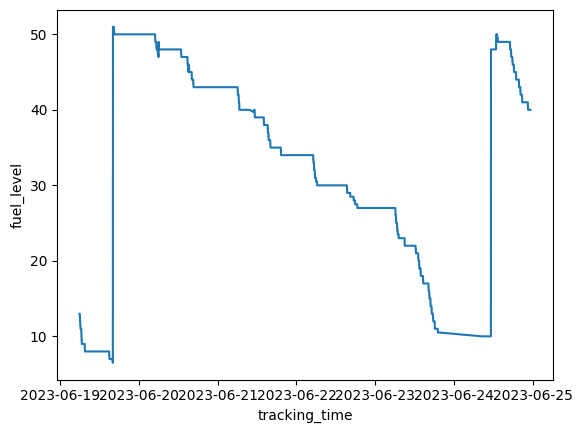

In [11]:
sns.lineplot(data=fuel_time_pd,x="tracking_time",y="fuel_level")

## Fuel Size Versus Angle

In [12]:
#Alv values
fuel_time={"tracking_time":[],"fuel_level":[],"angle":[]}
for i,alv in enumerate(LV_data.alv_data.values):
  alv_value=json.loads(alv)
  if alv_value.get("84")!=None:
    if float(alv_value.get("84"))!=0:
      fuel_time["tracking_time"].append(LV_data.at[i,"tracking_time"])
      fuel_time["angle"].append(LV_data.at[i,"angle"])
      fuel_time["fuel_level"].append(float(alv_value.get("84"))*0.1)
fuel_time_pd=pd.DataFrame(data=fuel_time)

In [13]:
fuel_time_pd

,tracking_time,fuel_level,angle
0,2023-06-19 06:03:32,13.0,223
1,2023-06-19 06:03:38,13.0,347
2,2023-06-19 06:03:52,13.0,285
3,2023-06-19 06:04:04,13.0,333
4,2023-06-19 06:04:25,13.0,278
...,...,...,...
3969,2023-06-24 22:48:48,40.0,148
3970,2023-06-24 22:49:13,40.0,148
3971,2023-06-24 22:49:21,40.0,148
3972,2023-06-24 22:59:23,40.0,148


In [14]:
px.line(data_frame=fuel_time_pd,x="tracking_time",y="fuel_level",text="angle")

## Add Altitude

In [15]:
#Alv values
fuel_time={"tracking_time":[],"fuel_level":[],"angle":[],"altitude":[]}
for i,alv in enumerate(LV_data.alv_data.values):
  alv_value=json.loads(alv)
  if alv_value.get("84")!=None:
    if float(alv_value.get("84"))!=0:
      fuel_time["tracking_time"].append(LV_data.at[i,"tracking_time"])
      fuel_time["angle"].append(LV_data.at[i,"angle"])
      fuel_time["altitude"].append(LV_data.at[i,"altitude"])
      fuel_time["fuel_level"].append(float(alv_value.get("84"))*0.1)
fuel_time_pd=pd.DataFrame(data=fuel_time)

In [16]:
fuel_time_pd

,tracking_time,fuel_level,angle,altitude
0,2023-06-19 06:03:32,13.0,223,50
1,2023-06-19 06:03:38,13.0,347,61
2,2023-06-19 06:03:52,13.0,285,59
3,2023-06-19 06:04:04,13.0,333,56
4,2023-06-19 06:04:25,13.0,278,47
...,...,...,...,...
3969,2023-06-24 22:48:48,40.0,148,104
3970,2023-06-24 22:49:13,40.0,148,104
3971,2023-06-24 22:49:21,40.0,148,104
3972,2023-06-24 22:59:23,40.0,148,104


In [17]:
fuel_time_pd.head(1000)

,tracking_time,fuel_level,angle,altitude
0,2023-06-19 06:03:32,13.0,223,50
1,2023-06-19 06:03:38,13.0,347,61
2,2023-06-19 06:03:52,13.0,285,59
3,2023-06-19 06:04:04,13.0,333,56
4,2023-06-19 06:04:25,13.0,278,47
...,...,...,...,...
995,2023-06-20 16:22:46,44.0,5,384
996,2023-06-20 16:22:55,44.0,277,381
997,2023-06-20 16:22:57,44.0,230,381
998,2023-06-20 16:23:14,44.0,155,381


In [18]:
px.line(data_frame=fuel_time_pd,x="tracking_time",y="fuel_level",text="altitude")

#**Cleaning Data Functions**

In [19]:
def increasingtPts():
  #found increasing point
  pts=[]
  #pts.append(fuel_time_pd.at[0,'fuel_level'])
  for i in range(fuel_time_pd['fuel_level'].size-1):
    if fuel_time_pd['fuel_level'].values[i] < fuel_time_pd['fuel_level'].values[i+1]:
      pts.append((fuel_time_pd['fuel_level'].values[i] , fuel_time_pd['fuel_level'].values[i+1]))
  return pts

In [20]:
#Test
increasingtPts()

[(6.5, 51.0),
 (47.0, 49.0),
 (45.0, 46.0),
 (39.7, 40.0),
 (10.0, 48.0),
 (48.0, 50.0)]

In [21]:
def avg(pts):
  sum=0
  for i,j in pts:
    sum+=j-i
    #print(sum)
  increasingAvg=sum/len(pts)
  return increasingAvg

In [22]:
#Test
avg(increasingtPts())

14.633333333333333

In [23]:
def isIncreasingPt(x1,x2):
  return x2>x1

In [24]:
def realIncPts(dist,avgIncr):
  return dist>=avgIncr

In [25]:
def searchCorrectVal(currentIdx,data):
  i=currentIdx-1
  while i>0:
    if data[i]>data[currentIdx]:
      return i
    i-=1
  return -1

In [69]:
def cleaningData(preparedData):
  #Calculate Increasing Avg
  avgIncreasing=avg(increasingtPts())
  for i in range(preparedData['fuel_level'].size-1):
    x1,x2=preparedData['fuel_level'].values[i] , preparedData['fuel_level'].values[i+1]
    #if is increasing point
    if isIncreasingPt(x1,x2):
      #calculate the increasing value
      dist=preparedData['fuel_level'].values[i+1]-preparedData['fuel_level'].values[i]
      #if the increasing is less than the avg value => wrong value
      if not realIncPts(dist,avgIncreasing):
        #replace it with the right value
        idx=searchCorrectVal(i+1,preparedData['fuel_level'].values)
        nbrPoints=i-idx
        #avoid case
        if nbrPoints<200:
          #replace
          preparedData.loc[idx+1:i,'fuel_level']=preparedData['fuel_level'].values[i+1]
  return preparedData

In [59]:
#test
cleanData=cleaningData(preparedData=loadData(LV_data))

In [64]:
cleanData.head()

,tracking_time,fuel_level
0,2023-06-19 06:03:32,13.0
1,2023-06-19 06:03:38,13.0
2,2023-06-19 06:03:52,13.0
3,2023-06-19 06:04:04,13.0
4,2023-06-19 06:04:25,13.0


In [63]:
#plot cleaning data
px.line(data_frame=cleanData,x="tracking_time",y="fuel_level",title="Clening Data Plot")

#**Fuel Consumed Calculation**

\begin{equation}
  TotalFuelConsumed=\sum_{i=1}^{n}ConsumedValue_{i}
\end{equation}

\begin{equation}
  ConsumedValue_i=(refuelLevel - initialLevel)
\end{equation}

In [65]:
#Algorithm fuel level Calculation
def calculateConsumedFuel(clean_data):
  data = clean_data
  #dataFrame.diff() => xi+1 - xi (decreasing<0 / increasing >0)
  data['fuel_diff'] = data['fuel_level'].diff() # Calculate the difference between consecutive fuel levels
  data.loc[data['fuel_diff'] > 0, 'fuel_diff'] = 0 # If the fuel level increases, we set the difference to 0
  total_fuel_consumed = abs(data['fuel_diff'].sum()) # The total fuel consumed is the absolute sum of the fuel differences
  return total_fuel_consumed

In [67]:
#Test Algorithm
print(f'Total fuel consumed: {calculateConsumedFuel(cleanData)} L')

Total fuel consumed: 57.5 L


In [68]:
#Manual calculation
total_fuel_consumed_M = (13-6.5)+(51-10)+(50-40)
print(f'Total fuel consumed: {total_fuel_consumed_M} L')

Total fuel consumed: 57.5 L
